**Table of contents:** 

*   Importing libraries
*   Wrangling the preprocessed India_crops dataset
*   Creating a new column named Area_category for area size categories (small,mid-sized and large) and outlier flags. 
*   Creating a new column for regular and outlier flags for the Production and Yield columns respectively. 
*   Dividing the dataset into subsets according to area and production category. 







In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import folium
import json

In [2]:
df = pd.read_csv('/content/India_crops_preprocessed.csv')

In [3]:
df.head()

,Unnamed: 0,State,District,Crop,Crop_Year,Season,Area,Production,Yield
0,0,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Kharif,2439.6,3415.0,1.40
1,1,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Rabi,1626.4,2277.0,1.40
2,2,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Autumn,4147.0,3060.0,0.74
3,3,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Summer,4147.0,2660.0,0.64
4,4,Andaman and Nicobar Island,NICOBARS,Arecanut,2009,Autumn,4153.0,3120.0,0.75


In [4]:
#Converstion of values within the district column to proper case

df['District '] = df['District '].str.title()

In [5]:
df.rename(columns = {'District ': 'District'}, inplace=True)

In [6]:
df.head()

,Unnamed: 0,State,District,Crop,Crop_Year,Season,Area,Production,Yield
0,0,Andaman and Nicobar Island,Nicobars,Arecanut,2007,Kharif,2439.6,3415.0,1.40
1,1,Andaman and Nicobar Island,Nicobars,Arecanut,2007,Rabi,1626.4,2277.0,1.40
2,2,Andaman and Nicobar Island,Nicobars,Arecanut,2008,Autumn,4147.0,3060.0,0.74
3,3,Andaman and Nicobar Island,Nicobars,Arecanut,2008,Summer,4147.0,2660.0,0.64
4,4,Andaman and Nicobar Island,Nicobars,Arecanut,2009,Autumn,4153.0,3120.0,0.75


In [ ]:
df = df.drop(columns= ['Unnamed: 0'], inplace = True)

<AxesSubplot:xlabel='Area', ylabel='Count'>

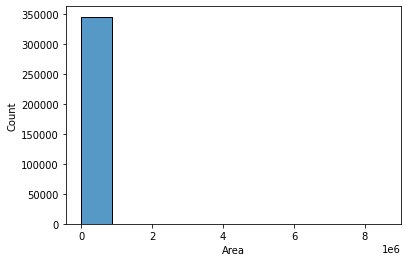

In [7]:
sns.histplot(df['Area'],  bins = 10)

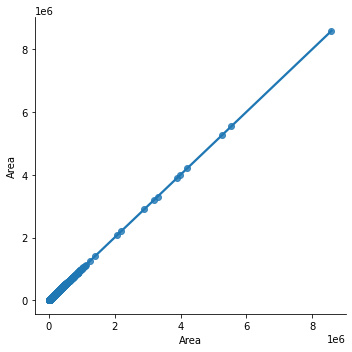

In [8]:
sns.lmplot(x = 'Area', y = 'Area', data = df)

Creating land categories according to area

In [9]:
#creating categories

df.loc[df['Area'] < 500, 'Area_Category'] = 'Small Land'

In [10]:
df.loc[(df['Area'] >= 500) & (df['Area'] < 1000), 'Area_Category'] = 'Mid-sized Land'

In [11]:
df.loc[(df['Area'] >= 1000) & (df['Area'] < 10170), 'Area_Category'] = 'Large Land'

In [12]:
#The greatest productions occured here, though a huge emount of the lands are wasted

df.loc[(df['Area'] >= 10170) & (df['Area'] < 150000),'Area_Category'] = 'Very Large Land (outliers)' #Statistically the outlier is 10169

In [13]:
df.loc[df['Area'] >= 150000, 'Area_Category'] = 'Extreme Outliers'

In [14]:
df['Area_Category'].value_counts(dropna = False)

Small Land                    169172
Large Land                     87606
Very Large Land (outliers)     51710
Mid-sized Land                 31023
Extreme Outliers                5825
Name: Area_Category, dtype: int64

In [15]:
df.shape

(345336, 10)

Creating Production categories according to production

<AxesSubplot:xlabel='Production', ylabel='Count'>

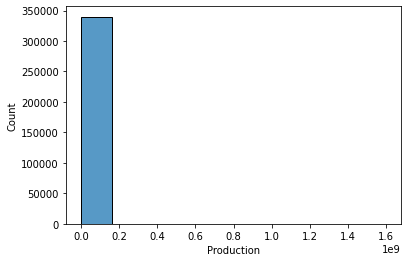

In [16]:
sns.histplot(df['Production'],  bins = 10)

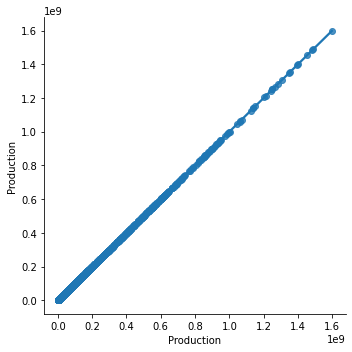

In [17]:
sns.lmplot(x = 'Production', y = 'Production', data = df)

<AxesSubplot:xlabel='Yield', ylabel='Count'>

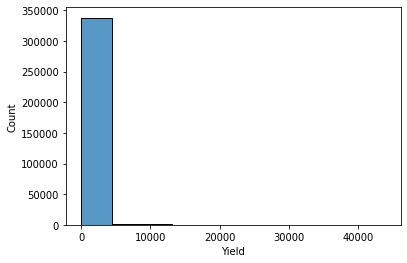

In [18]:
sns.histplot(df['Yield'],  bins = 10)

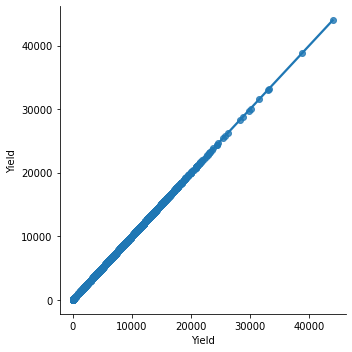

In [19]:
sns.lmplot(x = 'Yield', y = 'Yield', data = df)

Creating categories for production

In [20]:
#creating categories

df.loc[df['Production'] <= 17824.5, 'Production_Category'] = 'Regular Production'  #statistically the outlier is 17824.5

In [21]:
df.loc[df['Production'] > 17824.5, 'Production_Category'] = 'Outlier Production'

Creating categories for Yield

In [22]:
#creating categories

df.loc[df['Yield'] <= 5.395, 'Yield_Category'] = 'Regular Yield'  #statistically the outlier is 5.395

In [23]:
#creating categories

df.loc[df['Yield'] > 5.395, 'Yield_Category'] = 'Outlier Yield'  #statistically the outlier is 5.395

Checking counts of each category

In [24]:
df['Production_Category'].value_counts(dropna = False)

Regular Production    280294
Outlier Production     60094
NaN                     4948
Name: Production_Category, dtype: int64

In [25]:
df['Yield_Category'].value_counts(dropna = False)

Regular Yield    288996
Outlier Yield     51392
NaN                4948
Name: Yield_Category, dtype: int64

**Note:** This 4948 nan values are missing values in the production and yield columns

In [26]:
df.shape

(345336, 12)

Creating subsets according to Area

In [27]:
#subset for small to large lands

df_small_to_large_lands = df[df['Area'] < 10170]

In [28]:
#subset for very large lands

df_outlier_lands = df[df['Area'] >= 10170]

In [29]:
df_small_to_large_lands.shape

(287801, 12)

In [30]:
df_outlier_lands.shape

(57535, 12)

Downloading subsets

In [ ]:
#Downloading the subd datasets

from google.colab import files
df_small_to_large_lands.to_csv('Small_to_large_lands.csv') 
files.download('Small_to_large_lands.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
df_outlier_lands.to_csv('outlier_lands.csv') 
files.download('outlier_lands.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.head()

Creating subsets according to Production

In [31]:
#subset for regular Production

df_regular_production = df[df['Production'] <= 17824.5]

In [32]:
df_outlier_production = df[df['Production'] > 17824.5]

In [33]:
df_regular_production.shape

(280294, 12)

In [34]:
df_outlier_production.shape

(60094, 12)

In [35]:
df.head()

,Unnamed: 0,State,District,Crop,Crop_Year,Season,Area,Production,Yield,Area_Category,Production_Category,Yield_Category
0,0,Andaman and Nicobar Island,Nicobars,Arecanut,2007,Kharif,2439.6,3415.0,1.40,Large Land,Regular Production,Regular Yield
1,1,Andaman and Nicobar Island,Nicobars,Arecanut,2007,Rabi,1626.4,2277.0,1.40,Large Land,Regular Production,Regular Yield
2,2,Andaman and Nicobar Island,Nicobars,Arecanut,2008,Autumn,4147.0,3060.0,0.74,Large Land,Regular Production,Regular Yield
3,3,Andaman and Nicobar Island,Nicobars,Arecanut,2008,Summer,4147.0,2660.0,0.64,Large Land,Regular Production,Regular Yield
4,4,Andaman and Nicobar Island,Nicobars,Arecanut,2009,Autumn,4153.0,3120.0,0.75,Large Land,Regular Production,Regular Yield


In [36]:
#Downloading the main dataset

from google.colab import files
df.to_csv('India_crops_preprocessed_and_categorized.csv') 
files.download('India_crops_preprocessed_and_categorized.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Downloading the subd datasets

from google.colab import files
df_regular_production.to_csv('regular_production.csv') 
files.download('regular_production.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
df_outlier_production.to_csv('outlier_production.csv') 
files.download('outlier_production.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>